# Kernel density estimates

This notebook illustrates how to fit a kernel density estimate to some collected data. The data is plotted, together with the kernel density estimate and the samples generated from the model. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [ ]:
# Generate some data from a known distribution
rng = np.random.RandomState(42)
X = rng.standard_exponential((10000, 1))
X = X.reshape(-1, 1)

In [ ]:
# Create the model and fit it to the data
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)

In [ ]:
# Creates a grid of data points and evaluates the estimated PDF at said points 
x_grid = np.linspace(-1.0, X.max()*1.1, 1000)
log_density = kde.score_samples(x_grid[:, None])
density = np.exp(log_density)
samples = kde.sample(n_samples=100)

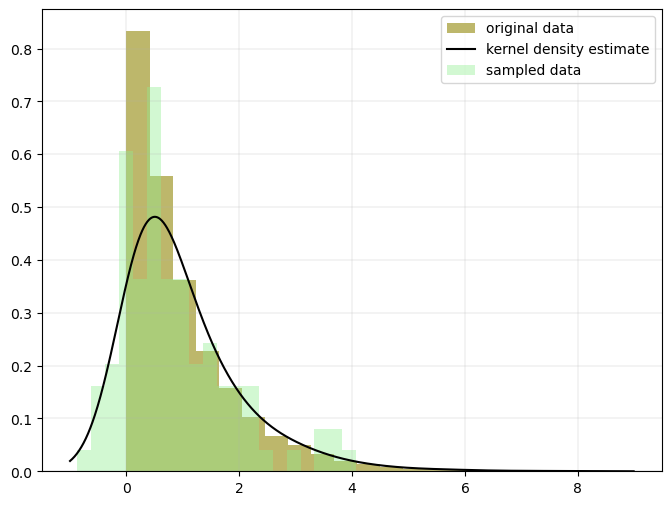

In [ ]:
# Plots the original data, the fitted model and samples from the model
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True, lw=0.2)
ax.hist(X[:, 0], bins=20, color='darkkhaki', label='original data', density=True)
ax.plot(x_grid, density, color='black', label='kernel density estimate')
ax.hist(samples, bins=20, color='lightgreen', label='sampled data', density=True, alpha=0.4)
ax.legend(loc='best')